**Practice Project 1**

In this project we will predict car price based on the features the dataset has.

In [2]:
#this practice project has been done in Google Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Source:**

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [3]:
path = "/*YOUR FILE PATH*/"

In [4]:
import pandas as pd
df = pd.read_csv(path + "car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
#in order to observe unique categorical values of categorical columns:
#**excluded Car_Name as it is not important**
catCols = [col for col in df.columns if df[col].dtype=="O"]
for i in catCols:
  if i != "Car_Name":
    print(f"{df[i].unique()}  number of categories: {len(df[i].unique())}")

['Petrol' 'Diesel' 'CNG']  number of categories: 3
['Dealer' 'Individual']  number of categories: 2
['Manual' 'Automatic']  number of categories: 2


In [7]:
#check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
#Creating a new dataframe excluding Car_Name as this column is not relevant for price prediction.

final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
#Creating a column called: "Current_Year"
from datetime import date
final_df['Current_Year'] = date.today().year

In [11]:
final_df['No_of_Year'] = final_df['Current_Year'] - final_df['Year'] 

In [12]:
final_df.drop(['Year', 'Current_Year'], axis=1, inplace = True)

In [13]:
final_df = pd.get_dummies(final_df, drop_first = True)

In [14]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [15]:
import seaborn as sns

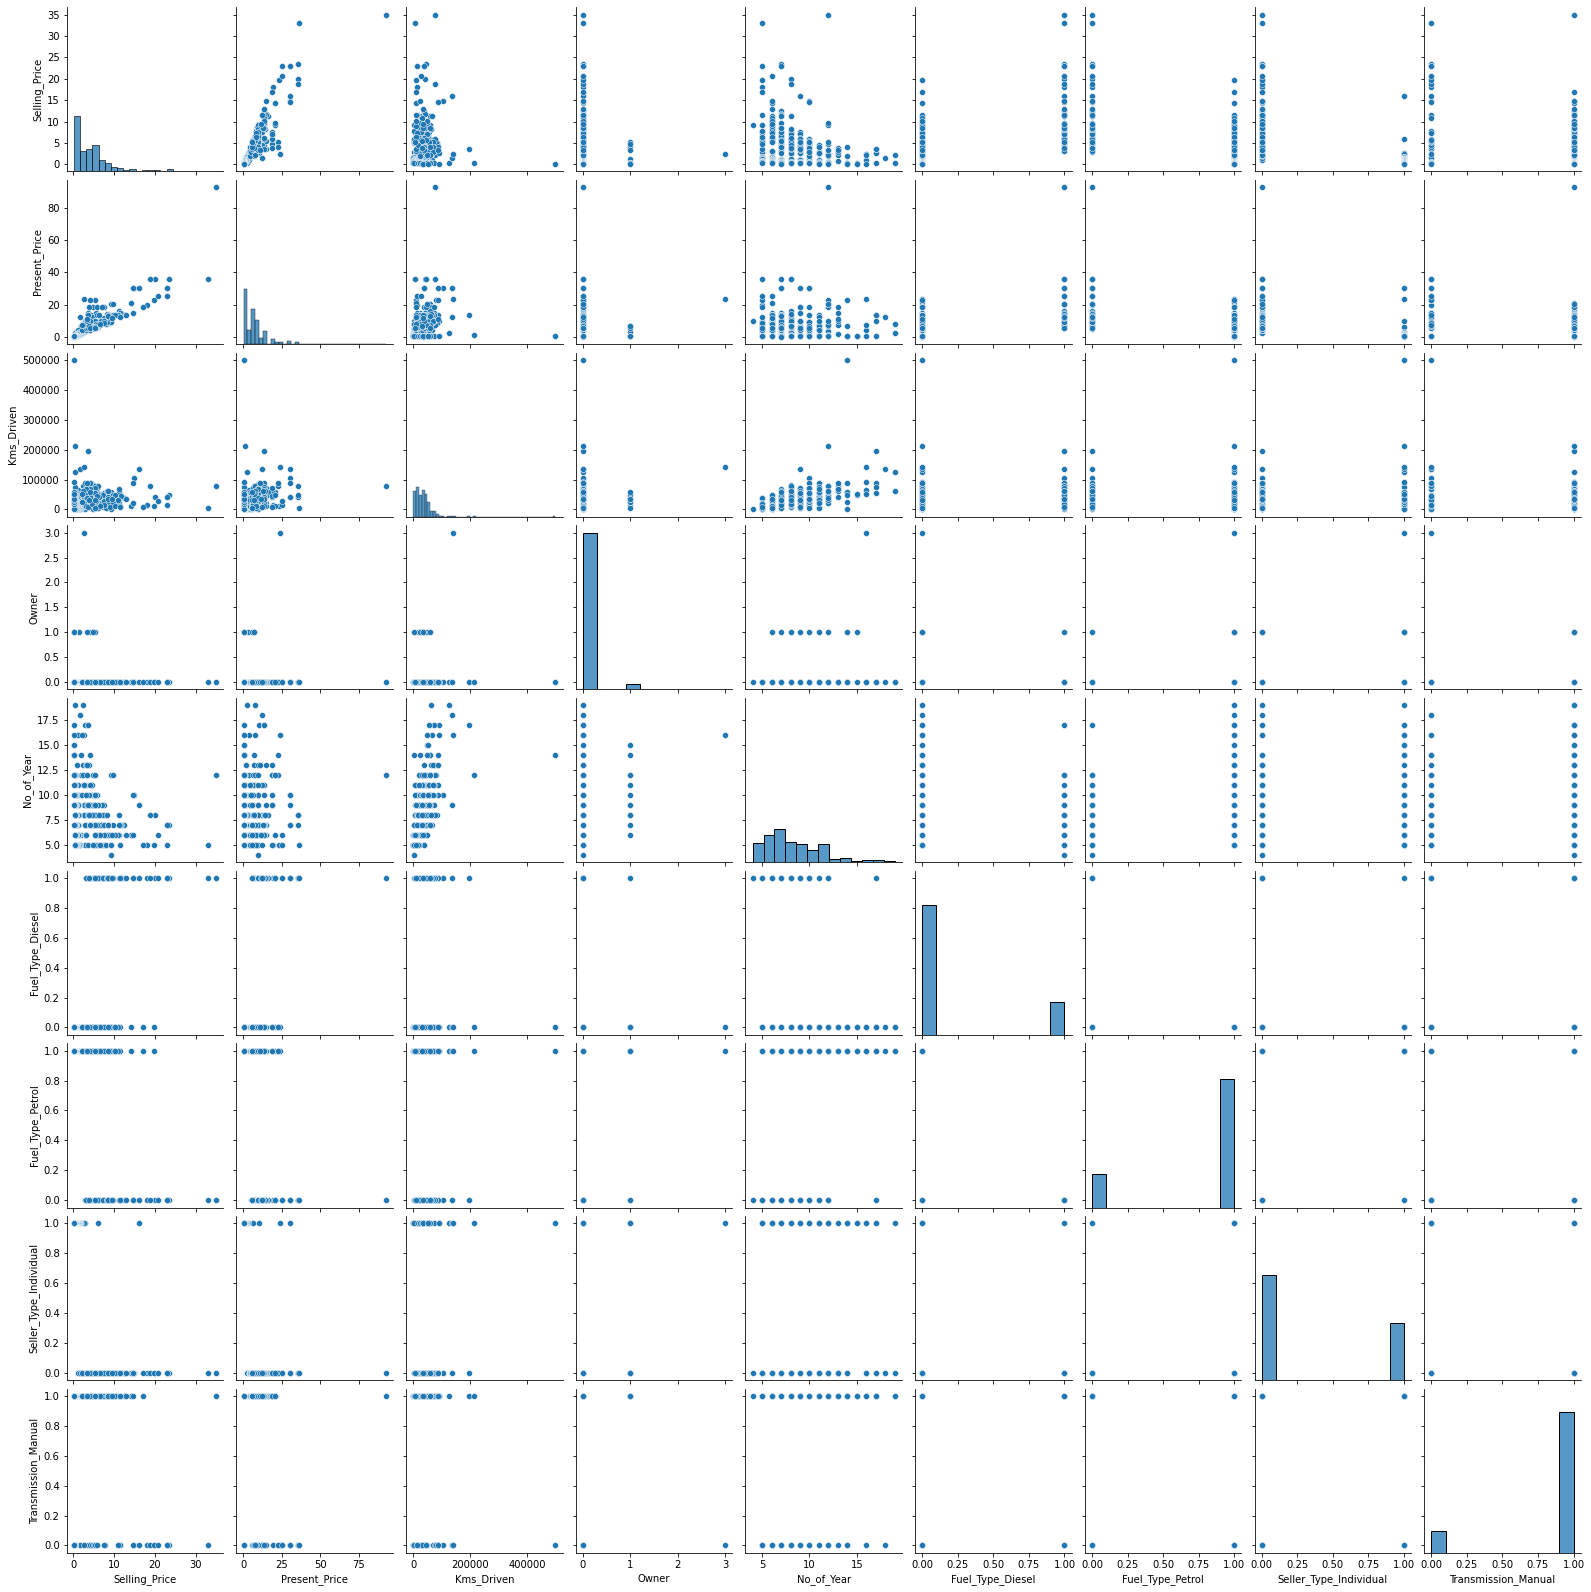

In [19]:
sns.pairplot(final_df)

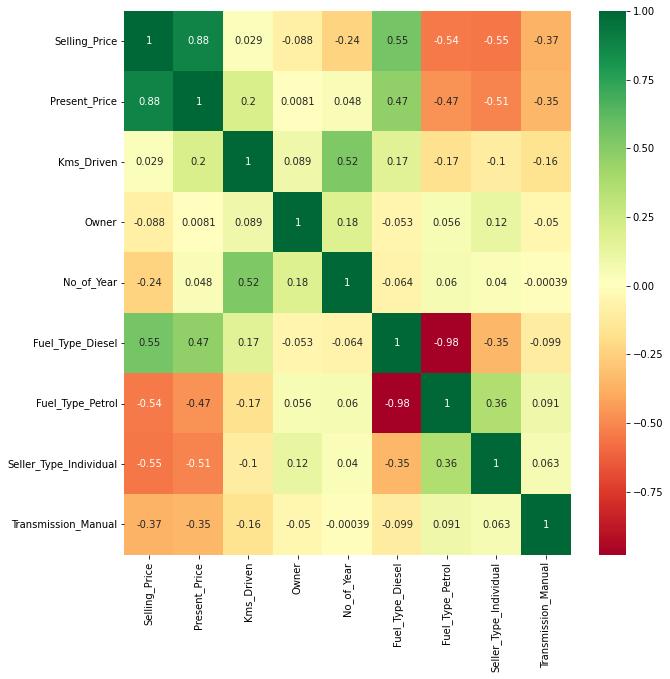

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat=final_df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(10,10)) 
#plot heatmap of correlation
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#the higher the correlation the higher the .......

In [17]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [18]:
final_df.shape

(301, 9)

In [19]:
#independent and dependent features
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [75]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [20]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [21]:
X.shape

(301, 8)

# Feature Importance(Optional)

In [22]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[3.87064526e-01 4.00446807e-02 3.60453104e-04 7.63641529e-02
 2.27688498e-01 1.18171818e-02 1.19728905e-01 1.36931602e-01]


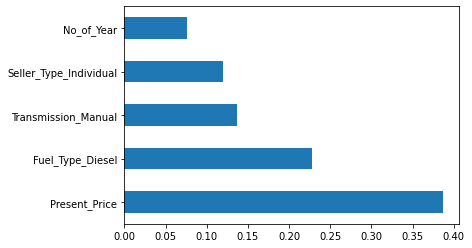

In [23]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Correlated Feature Remover

In [50]:
# # with the following function we can select highly correlated features
# # it will remove the first feature that is correlated with anything other feature

# def correlation(dataset, threshold):
#     col_corr = []  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
#               col_corr.append(corr_matrix.columns[i]) # getting the name of column
#     return col_corr

In [51]:
# corr_features = correlation(final_df, 0.80)
# len(set(corr_features))
# corr_features

['Present_Price']

# Model Prediction

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
# we use RandomizedSearchCV in order to pick the best set of hyperparameters to train the RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
#Setting values for RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [26]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [27]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [28]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [29]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

# Result Analysis

In [30]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [31]:
rf_random.best_score_

-3.9564983739787065

In [32]:
predictions=rf_random.predict(X_test)

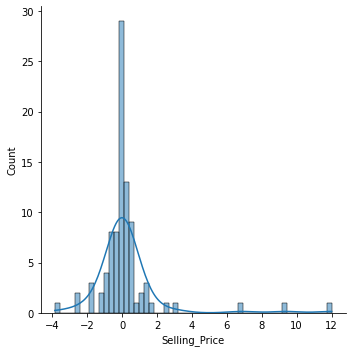

In [52]:
#plotting the difference between the actual value y_test vs X_test
sns.displot(y_test-predictions, kde=True)

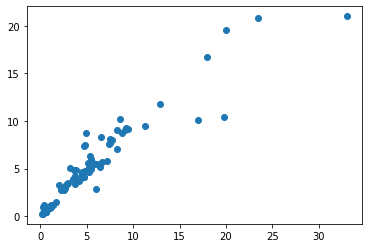

In [36]:
plt.scatter(y_test,predictions)

In [37]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8806339560439547
MSE: 3.9466068742890092
RMSE: 1.9866068746203938


In [38]:
import pickle
# open a file, where you want to store the data
file = open(path + "random_forest_regression_model.pkl", 'wb')

# dump information to that file
pickle.dump(rf_random, file)